# Predicting Stock Prices using Long Short Term Memory(LSTM)


In [ ]:
!pip install quandl

## Check out the Data

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(26,16))
plt.rc('lines', markersize=4)

import warnings
warnings.filterwarnings("ignore")

### Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Configure Quandl

In [ ]:
# Quandl API Auth
quandl.ApiConfig.api_key = "eUJL46B7yExHJ2K5K1Bp"

### Get the Data

In [ ]:
bse_list = pd.read_csv('/content/drive/MyDrive/Stock Price Prediction/bse_list.csv', sep = '|')
pd.set_option("display.max_rows", None, "display.max_columns", None)
bse_list

,STOCK,CODE
0,20 Microns Ltd. EOD Prices,BOM533022
1,3i Infotech Ltd. EOD Prices,BOM532628
2,3m India Ltd. EOD Prices,BOM523395
3,7seas Technologies Ltd-$ EOD Prices,BOM590116
4,8k Miles Software Services Ltd. EOD Prices,BOM512161
5,A.f. Enterprises Ltd EOD Prices,BOM538351
6,A.k. Spintex Ltd EOD Prices,BOM539300
7,A.k.capital Services Ltd. EOD Prices,BOM530499
8,A2z Infra Engineering Limited EOD Prices,BOM533292
9,Aadhaar Ventures India Ltd. EOD Prices,BOM531611


In [ ]:
stock = str(input("Enter the code of the stock you want to process:"))

Enter the code of the stock you want to process:BOM533287


In [ ]:
print("The stock you have selcted is :")
bse_list.loc[bse_list['CODE'] == stock]

The stock you have selcted is :


,STOCK,CODE
4518,Zee Learn Ltd. EOD Prices,BOM533287


In [ ]:
stock = 'BSE/' + stock

In [ ]:
# Set start and end date for stock prices
start_date = datetime.date(2000, 3,8)
end_date = datetime.date.today()
# Load data from Quandl
data = quandl.get(stock, start_date=start_date, end_date=end_date)
# Save data to CSV file
data.to_csv('/content/drive/MyDrive/Stock Price Prediction/data/stock.csv')
data.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2010-12-20,73.95,73.95,15.00,19.75,18.234812,4820212.0,6815.0,87895660.0,4820212.0,100.0,58.95,-54.2
2010-12-21,20.70,20.70,18.80,20.70,20.192165,553159.0,711.0,11169478.0,553159.0,100.0,1.90,0.0
2010-12-22,21.70,21.70,21.70,21.70,21.699987,38025.0,126.0,825142.0,38025.0,100.0,0.00,0.0
2010-12-23,22.75,22.75,22.75,22.75,22.750000,730480.0,983.0,16618420.0,730480.0,100.0,0.00,0.0
2010-12-24,23.85,23.85,23.50,23.85,23.846691,294692.0,508.0,7027429.0,294692.0,100.0,0.35,0.0


In [ ]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2571 entries, 2010-12-20 to 2021-05-05
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       2571 non-null   float64
 1   High                       2571 non-null   float64
 2   Low                        2571 non-null   float64
 3   Close                      2571 non-null   float64
 4   WAP                        2571 non-null   float64
 5   No. of Shares              2571 non-null   float64
 6   No. of Trades              2571 non-null   float64
 7   Total Turnover             2571 non-null   float64
 8   Deliverable Quantity       2570 non-null   float64
 9   % Deli. Qty to Traded Qty  2570 non-null   float64
 10  Spread H-L                 2571 non-null   float64
 11  Spread C-O                 2571 non-null   float64
dtypes: float64(12)
memory usage: 261.1 KB


In [ ]:
# Get descriptive statistics summary of data set 
data.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,2571.000000,2571.000000,2571.000000,2571.000000,2571.000000,2.571000e+03,2571.000000,2.571000e+03,2.570000e+03,2570.000000,2571.000000,2571.000000
mean,28.193131,28.768180,27.520665,28.055473,28.125102,1.450507e+05,497.302606,4.039260e+06,8.127627e+04,59.251424,1.247515,-0.137658
std,9.987066,10.121497,9.801852,9.903222,9.935404,6.144839e+05,833.083377,2.499157e+07,5.484675e+05,19.142274,1.432580,1.338533
min,9.810000,10.100000,9.750000,9.900000,9.900000,3.340000e+02,7.000000,1.051300e+04,2.060000e+02,2.820000,0.000000,-54.200000
25%,20.100000,20.500000,19.550000,20.000000,20.036334,1.638750e+04,122.500000,4.472635e+05,9.561750e+03,46.257500,0.650000,-0.500000
50%,28.100000,28.800000,27.500000,28.050000,28.162740,4.171400e+04,249.000000,1.124328e+06,2.362500e+04,58.680000,1.000000,-0.120000
75%,35.800000,36.350000,35.050000,35.600000,35.756270,1.116820e+05,485.000000,2.826277e+06,6.287075e+04,70.957500,1.500000,0.250000
max,73.950000,73.950000,49.600000,50.200000,50.570000,2.725318e+07,10304.000000,1.195926e+09,2.619298e+07,100.000000,58.950000,5.650000


In [ ]:
# Display features in data set
data.columns

Index(['Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares', 'No. of Trades',
       'Total Turnover', 'Deliverable Quantity', '% Deli. Qty to Traded Qty',
       'Spread H-L', 'Spread C-O'],
      dtype='object')

### Select Subset with relevant features

We use the daily closing price **Close** as the value to predict, so we can discard the other features.  

* 'Close' column has numerical data type
* The 'Date' is the index column and contains datetime values

In [ ]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [ ]:
df.head()

,Date,Close
0,2010-12-20,19.75
1,2010-12-21,20.70
2,2010-12-22,21.70
3,2010-12-23,22.75
4,2010-12-24,23.85


In [ ]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2571 non-null   datetime64[ns]
 1   Close   2571 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.3 KB


In [ ]:
# Check for missing values in the columns
df.isna().values.any()

False

## Explore the Data

When we take a look at the price movement over time by simply plotting the *Closing price* vs *Time*, we can already see, that the price continously increases over time and we can also estimate that trend could be linear.

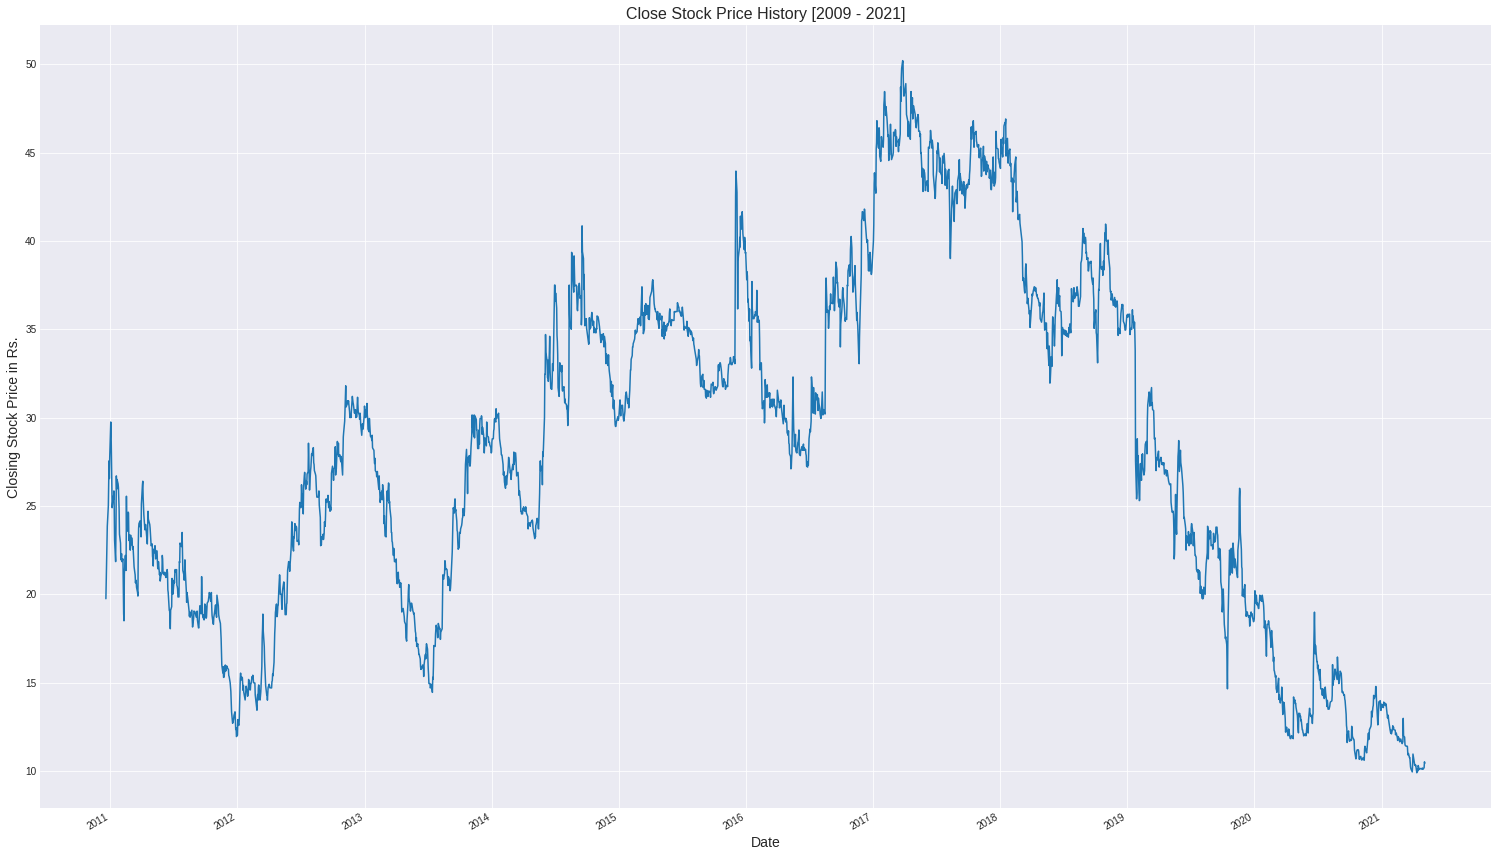

In [ ]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2021]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in Rs.', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

#Long Short Term Memory 

###Importing required libraries

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

###creating dataframe

In [ ]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data.head()

,Date,Close
0,2010-12-20 00:00:00,19.75
1,2010-12-21 00:00:00,20.7
2,2010-12-22 00:00:00,21.7
3,2010-12-23 00:00:00,22.75
4,2010-12-24 00:00:00,23.85


###setting index

In [ ]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
new_data.head()

,Close
Date,
2010-12-20,19.75
2010-12-21,20.7
2010-12-22,21.7
2010-12-23,22.75
2010-12-24,23.85


In [ ]:
new_data.describe()

,Close
count,2571.0
unique,876.0
top,36.0
freq,15.0


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2571 entries, 2010-12-20 to 2021-05-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2571 non-null   object
dtypes: object(1)
memory usage: 40.2+ KB


In [ ]:
new_data.columns

Index(['Close'], dtype='object')

###creating train and test sets

In [ ]:
dataset = new_data.values
data_length = len(dataset)
train = dataset[0:(data_length//2),:]
valid = dataset[(data_length//2):,:]

###converting dataset into x_train and y_train


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(500,len(train)):
    x_train.append(scaled_data[i-500:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))



###create and fit the LSTM network

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

785/785 - 133s - loss: 0.0037


###predicting values, using past values from the train data

In [ ]:
inputs = new_data[len(new_data) - len(valid) - 500:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(500,inputs.shape[0]):
    X_test.append(inputs[i-500:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


In [ ]:
rmse = np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rmse)

1.5046161863561482


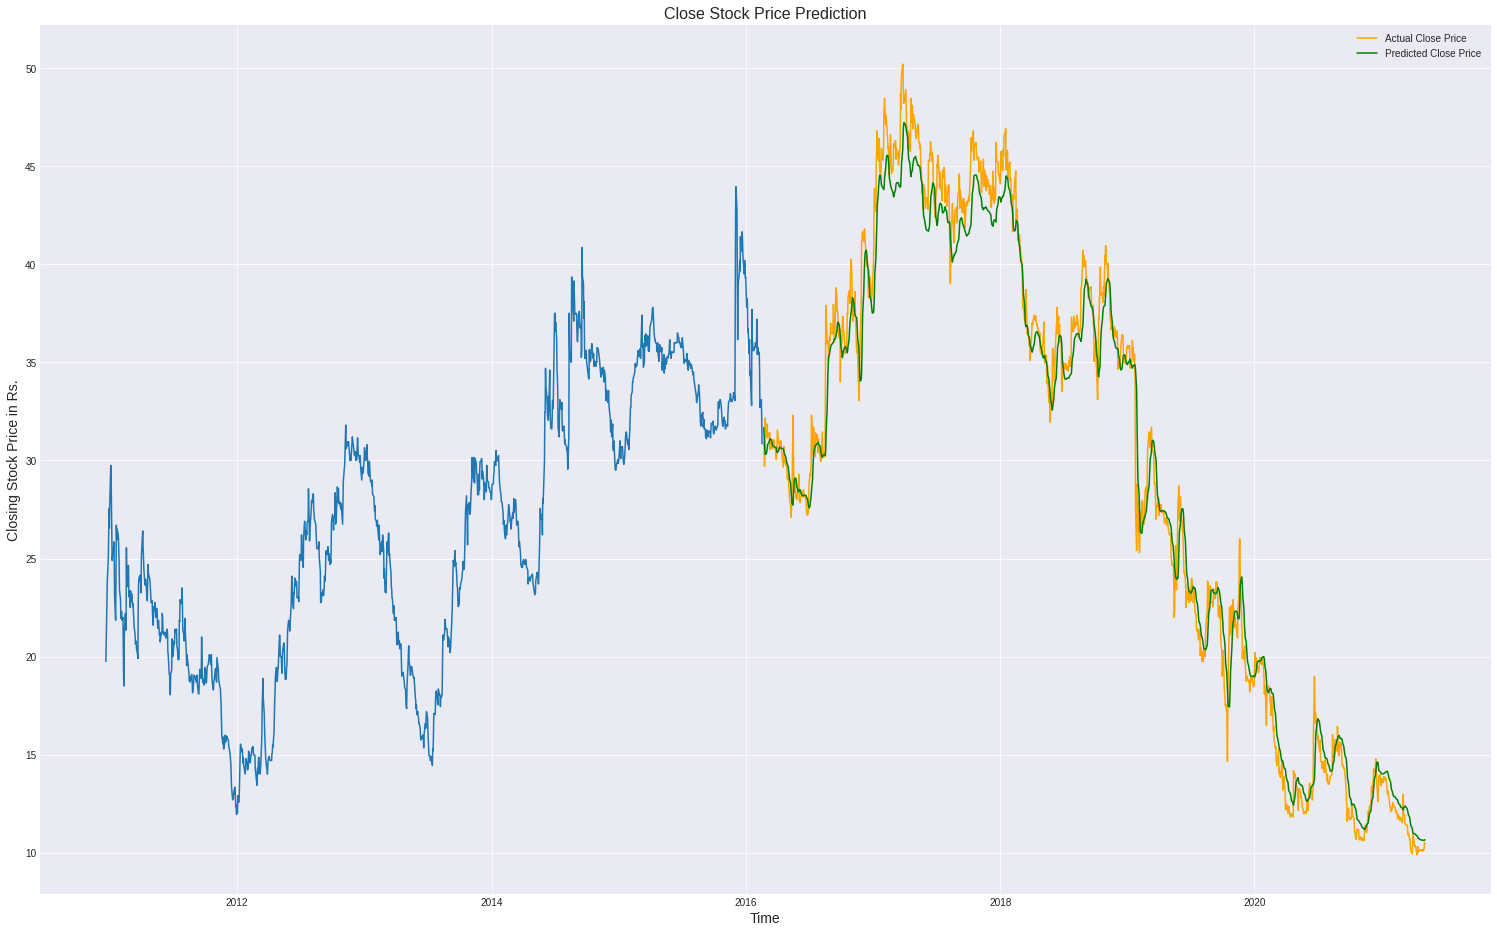

In [ ]:
#for plotting
train = new_data[:(data_length//2)-2]
valid = new_data[(data_length//2):]


valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid['Close'],label = 'Actual Close Price',color = 'Orange')
plt.plot(valid['Predictions'],label = 'Predicted Close Price',color = 'Green')
# Set figure title
plt.title('Close Stock Price Prediction', fontsize=16)
# Set x label
plt.xlabel('Time', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in Rs.', fontsize=14)

plt.legend()
plt.show()